In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import xgboost as XGB

# Load dataset
df = pd.read_csv("./Extended_Lap_Data_Updated_unique_v5.csv")

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled DataFrame to a new CSV file
shuffled_file_path = "./Extended_Lap_Data_Updated_unique_v5_shuffled.csv"
df.to_csv(shuffled_file_path, index=False)

print(f"Shuffled CSV file saved to {shuffled_file_path}")
df

Shuffled CSV file saved to ./Extended_Lap_Data_Updated_unique_v5_shuffled.csv


,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,velocity,lap time,vehicle_name,lap,vehicle_type,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,16.761557,0.008330,144.970090,55.193212,8.874851,6.914119,44.901266,vehicle.tesla.cybertruck,245,Truck,...,98.503029,53.5,1600.0,3200.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
1,15.253209,0.002482,166.013005,43.163813,2.997979,2.455143,43.318199,vehicle.toyota.prius,314,Car,...,93.373116,37.0,800.0,1600.0,3.0,20.0,3000.0,-11518.075195,5544.257324,93.373116
2,15.713101,0.002494,271.003099,33.472689,2.691240,5.781884,47.059081,vehicle.vespa.zx125,20,Motorcycle,...,73.714622,21.5,1500.0,3000.0,2.0,17.0,1000.0,-137.477127,2441.143555,73.714622
3,15.302518,0.006131,165.632373,50.571982,3.165107,5.176160,42.442205,vehicle.nissan.patrol_2021,38,Car,...,89.348190,45.0,1500.0,3000.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
4,15.343909,0.007834,142.860484,50.310407,7.980856,7.235589,46.354878,vehicle.tesla.cybertruck,308,Truck,...,98.503029,53.5,1600.0,3200.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,14.380167,0.007294,175.731187,49.069397,5.159092,3.092050,42.525907,vehicle.nissan.patrol_2021,235,Car,...,89.348190,45.0,1500.0,3000.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
8496,16.022074,0.005379,191.933611,44.132699,7.266676,3.789209,43.501336,vehicle.mini.cooper_s_2021,192,Car,...,88.880165,37.5,500.0,1000.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8497,14.971989,0.005382,192.443201,45.178941,7.104845,4.981060,43.923082,vehicle.mini.cooper_s_2021,391,Car,...,88.880165,37.5,500.0,1000.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8498,15.597976,0.012453,238.039968,49.891043,3.137115,4.156630,44.292306,vehicle.carlamotors.carlacola,361,Truck,...,89.066559,46.0,2700.0,5400.0,5.0,20.0,3000.0,1839.163330,2566.663330,89.066559


In [6]:
df = df.drop(
    columns=[
        # "mass",
        "center_of_mass_x",
        "front_left_wheel_radius",
        "front_right_wheel_radius",
        "rear_right_wheel_radius",
        "front_left_wheel_max_brake_torque",
        "front_right_wheel_max_brake_torque",
        "rear_left_wheel_max_brake_torque",
        "rear_right_wheel_max_handbrake_torque",
        "gear_switch_time",
    ],
    errors="ignore",
)

In [7]:
df

,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,velocity,lap time,vehicle_name,lap,vehicle_type,...,rear_left_wheel_position_x,rear_left_wheel_position_y,rear_left_wheel_position_z,rear_right_wheel_max_brake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,16.761557,0.008330,144.970090,55.193212,8.874851,6.914119,44.901266,vehicle.tesla.cybertruck,245,Truck,...,-4627.861816,21.518143,98.503029,1600.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
1,15.253209,0.002482,166.013005,43.163813,2.997979,2.455143,43.318199,vehicle.toyota.prius,314,Car,...,-11365.126953,5545.971680,93.373116,800.0,3.0,20.0,3000.0,-11518.075195,5544.257324,93.373116
2,15.713101,0.002494,271.003099,33.472689,2.691240,5.781884,47.059081,vehicle.vespa.zx125,20,Motorcycle,...,-137.588272,2481.143311,73.714622,1500.0,2.0,17.0,1000.0,-137.477127,2441.143555,73.714622
3,15.302518,0.006131,165.632373,50.571982,3.165107,5.176160,42.442205,vehicle.nissan.patrol_2021,38,Car,...,-1689.149170,13113.729492,89.348190,1500.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
4,15.343909,0.007834,142.860484,50.310407,7.980856,7.235589,46.354878,vehicle.tesla.cybertruck,308,Truck,...,-4627.861816,21.518143,98.503029,1600.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,14.380167,0.007294,175.731187,49.069397,5.159092,3.092050,42.525907,vehicle.nissan.patrol_2021,235,Car,...,-1689.149170,13113.729492,89.348190,1500.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
8496,16.022074,0.005379,191.933611,44.132699,7.266676,3.789209,43.501336,vehicle.mini.cooper_s_2021,192,Car,...,3397.290527,13136.708984,88.880165,500.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8497,14.971989,0.005382,192.443201,45.178941,7.104845,4.981060,43.923082,vehicle.mini.cooper_s_2021,391,Car,...,3397.290527,13136.708984,88.880165,500.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8498,15.597976,0.012453,238.039968,49.891043,3.137115,4.156630,44.292306,vehicle.carlamotors.carlacola,361,Truck,...,1839.751709,2354.903564,89.066559,2700.0,5.0,20.0,3000.0,1839.163330,2566.663330,89.066559


Dataset shape: (8500, 44)
Vehicle types and counts: 
vehicle_type
Car           3500
Motorcycle    2000
Truck         1500
Van           1500
Name: count, dtype: int64
Missing values: 
0


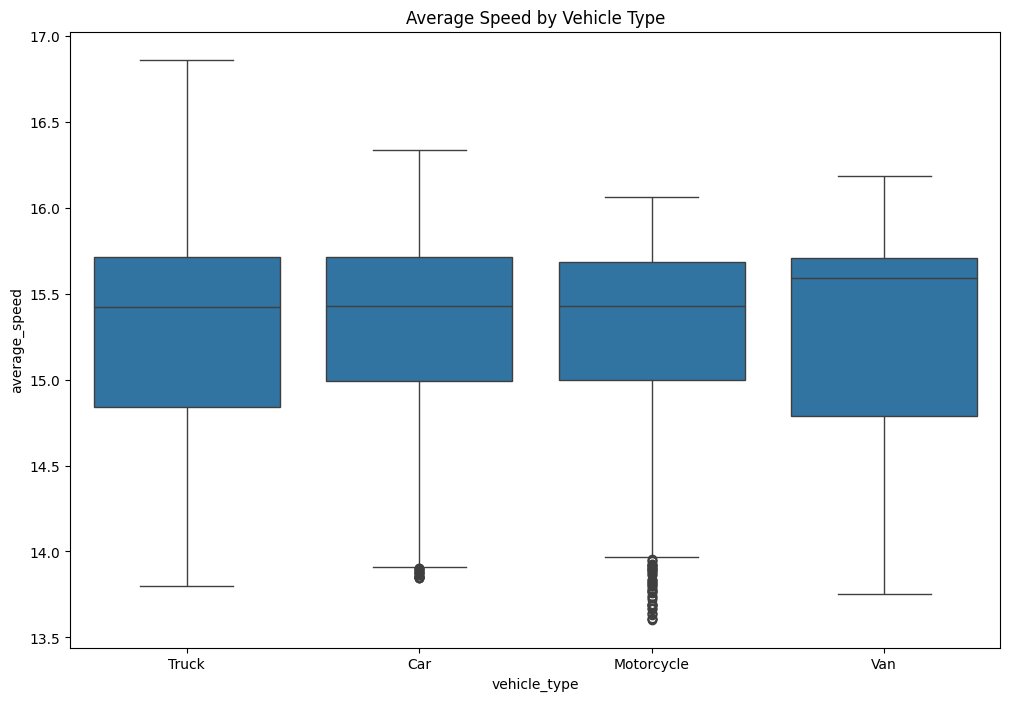

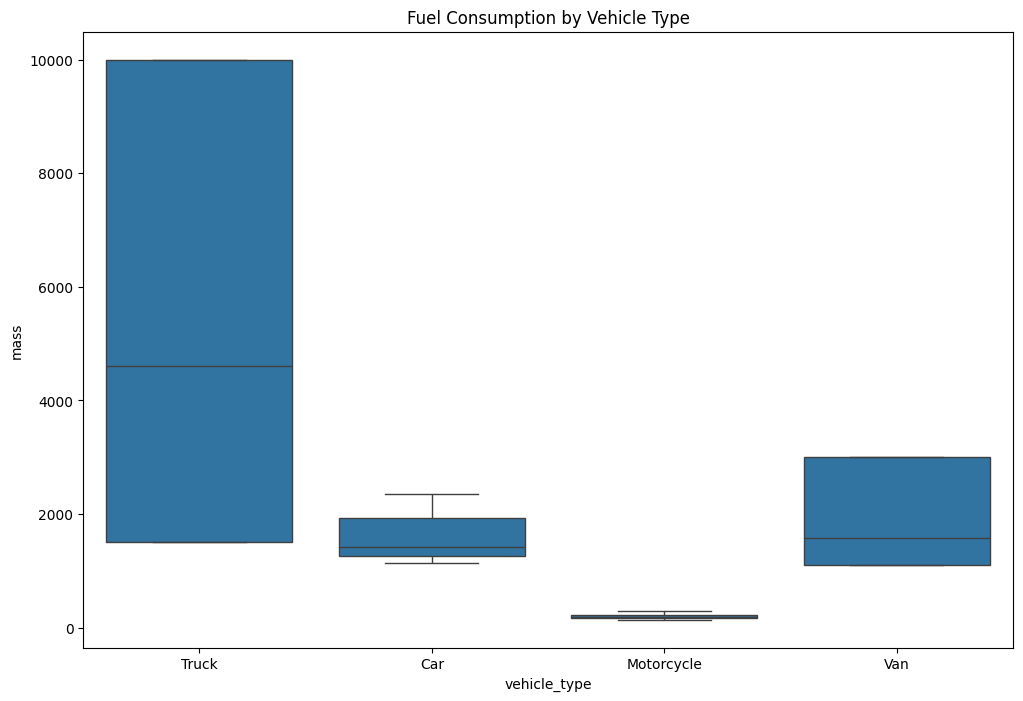

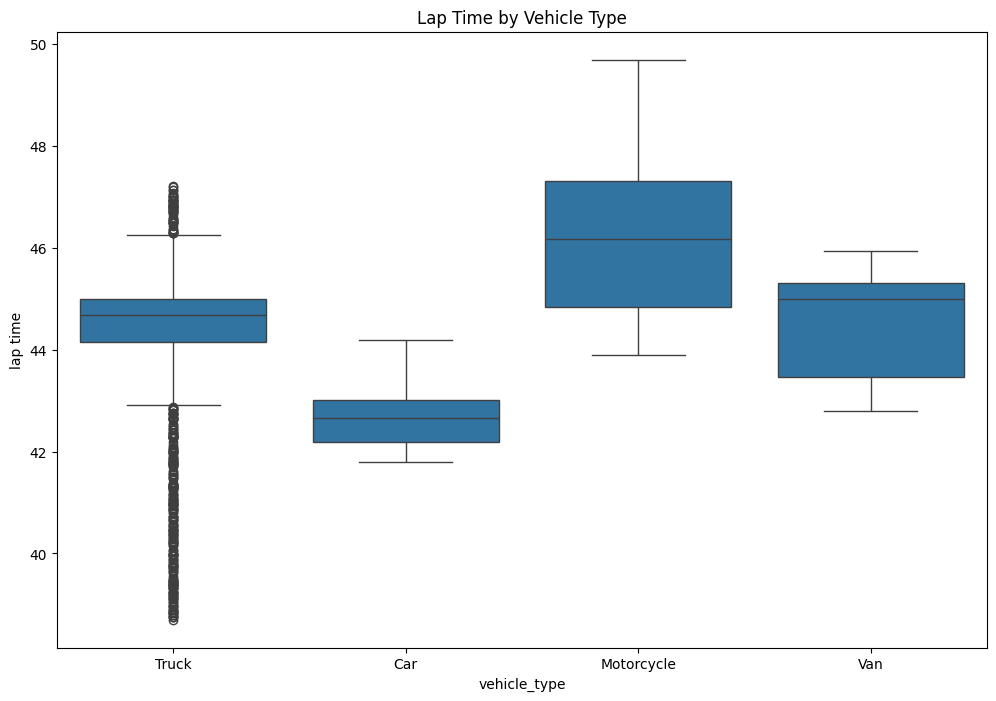

Encoded class mapping: {'Car': 0, 'Motorcycle': 1, 'Truck': 2, 'Van': 3}


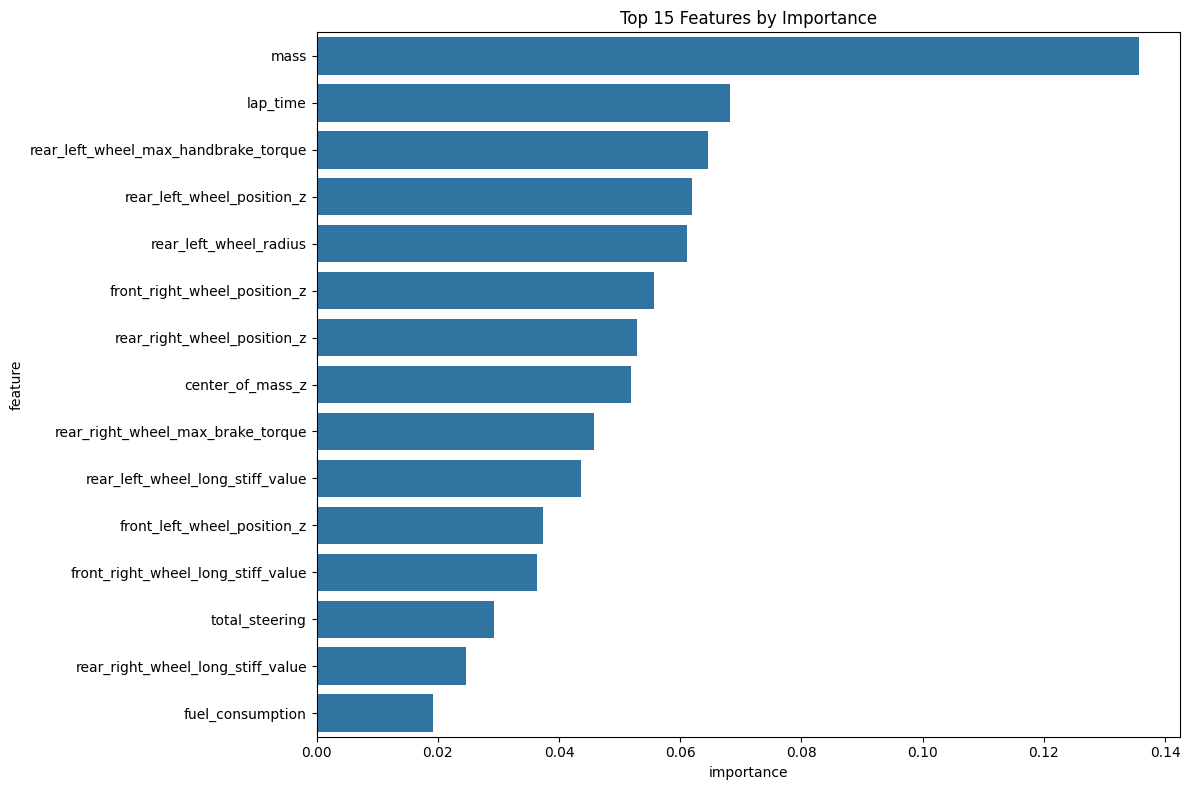

Selected features: Index(['fuel_consumption', 'total_steering', 'total_throttle', 'lap_time',
       'mass', 'center_of_mass_z', 'front_left_wheel_long_stiff_value',
       'front_left_wheel_position_x', 'front_left_wheel_position_y',
       'front_left_wheel_position_z', 'front_right_wheel_long_stiff_value',
       'front_right_wheel_position_z', 'rear_left_wheel_radius',
       'rear_left_wheel_max_handbrake_torque',
       'rear_left_wheel_long_stiff_value', 'rear_left_wheel_position_y',
       'rear_left_wheel_position_z', 'rear_right_wheel_max_brake_torque',
       'rear_right_wheel_long_stiff_value', 'rear_right_wheel_position_y',
       'rear_right_wheel_position_z'],
      dtype='object')


In [ ]:
# Basic data exploration
print(f"Dataset shape: {df.shape}")
print(f"Vehicle types and counts: \n{df['vehicle_type'].value_counts()}")
print(f"Missing values: \n{df.isnull().sum().sum()}")

# Handle any missing values if they exist
df = df.dropna()

# Exploratory data analysis - visualize relationship between features and vehicle type
plt.figure(figsize=(12, 8))
sns.boxplot(x="vehicle_type", y="average_speed", data=df)
plt.title("Average Speed by Vehicle Type")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x="vehicle_type", y="mass", data=df)
plt.title("Mass by Vehicle Type")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x="vehicle_type", y="lap time", data=df)
plt.title("Lap Time by Vehicle Type")
plt.show()


# Create feature matrix and target vector
X = df.drop(
    columns=["vehicle_type", "vehicle_name", "lap"]
)  # Remove unnecessary columns
y = df["vehicle_type"]

# Convert lap time to numeric if not already
if "lap time" in X.columns:
    X = X.rename(columns={"lap time": "lap_time"})

# Encode categorical variables if any remain
categorical_cols = X.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(
    f"Encoded class mapping: {dict(zip(le_target.classes_, range(len(le_target.classes_))))}"
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature importance-based selection
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_scaled, y_train)

# Plot feature importance
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_selector.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance.head(15))
plt.title("Top 15 Features by Importance")
plt.tight_layout()
plt.show()

# Select top features
selector = SelectFromModel(rf_selector, prefit=True, threshold="median")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

In [ ]:
# Train models with hyperparameter tuning
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGB.XGBClassifier(random_state=42, eval_metric="mlogloss"),
    "Naive Bayes": GaussianNB(),
}

# Dictionary to store the best models
best_models = {}

# Grid search parameters
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
    "Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]},
}

# Perform grid search for each model
for name, model in models.items():
    grid_search = GridSearchCV(
        model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_selected, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    best_models[name] = grid_search.best_estimator_

# Evaluate on test set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")

    # Convert numeric predictions back to original labels
    y_pred_original = le_target.inverse_transform(y_pred)
    y_test_original = le_target.inverse_transform(y_test)

    print(classification_report(y_test_original, y_pred_original))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_original, y_pred_original)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=le_target.classes_,
        yticklabels=le_target.classes_,
    )
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Compare models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Feature importance from the best model
if "Random Forest" in best_models:
    best_model = best_models["Random Forest"]
    feature_imp = pd.DataFrame(
        {"Feature": selected_features, "Importance": best_model.feature_importances_}
    ).sort_values("Importance", ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=feature_imp)
    plt.title("Feature Importance from Best Model")
    plt.tight_layout()
    plt.show()

    # Visualize the decision space (using top 2 features)
    if len(selected_features) >= 2:
        top_features = feature_imp["Feature"].iloc[:2].values
        top_feature_indices = [
            list(selected_features).index(feat) for feat in top_features
        ]

        plt.figure(figsize=(12, 10))

        from matplotlib.colors import ListedColormap

        colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF"]
        cmap = ListedColormap(colors[: len(le_target.classes_)])

        # Get the best model
        best_model_name = max(results, key=results.get)
        model = best_models[best_model_name]

        # Create a mesh grid
        X_test_top2 = X_test_selected[:, top_feature_indices]
        x_min, x_max = X_test_top2[:, 0].min() - 1, X_test_top2[:, 0].max() + 1
        y_min, y_max = X_test_top2[:, 1].min() - 1, X_test_top2[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, (x_max - x_min) / 100),
            np.arange(y_min, y_max, (y_max - y_min) / 100),
        )

        # Create an array with all zeros except for the two selected feature indices
        mesh_points = np.zeros((xx.ravel().shape[0], X_train_selected.shape[1]))
        mesh_points[:, top_feature_indices[0]] = xx.ravel()
        mesh_points[:, top_feature_indices[1]] = yy.ravel()

        # Predict on the mesh grid
        Z = model.predict(mesh_points)
        Z = Z.reshape(xx.shape)

        # Plot decision boundaries
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

        # Plot the test points
        for i, class_value in enumerate(np.unique(y_test)):
            idx = np.where(y_test == class_value)
            plt.scatter(
                X_test_selected[idx, top_feature_indices[0]],
                X_test_selected[idx, top_feature_indices[1]],
                alpha=0.8,
                label=le_target.inverse_transform([class_value])[0],
            )

        plt.xlabel(top_features[0])
        plt.ylabel(top_features[1])
        plt.title(f"Decision Boundary using {best_model_name} (Top 2 Features)")
        plt.legend()
        plt.show()

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.describe()

df = df.dropna()
# Vehicle type classification
y_vehicle = df['vehicle_type']

# Lap time classification (Fast, Medium, Slow)
def categorize_lap_time(time):
    if time <= 42.5:
        return 'Fast'
    elif 42.5 < time <= 45:
        return 'Medium'
    else:
        return 'Slow'

df['lap_time_category'] = df['lap time'].apply(categorize_lap_time)
y_lap = df['lap_time_category']
# Splitting features and labels
X = df.drop(columns=['vehicle_type', 'lap time', 'lap_time_category'])
# X = df.drop(columns=['vehicle_type'])  # Replace 'target_column' with actual target column name
y = df['vehicle_type']  # Replace 'target_column' with actual target column name


y_lap = LabelEncoder().fit_transform(y_lap)
y_vehicle = df['vehicle_type']
y = LabelEncoder().fit_transform(y)

# Splitting features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train_lap, X_test_lap, y_train_lap, y_test_lap = train_test_split(X, y_lap, test_size=0.3, random_state=42)

print(df['vehicle_type'].value_counts())
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=120, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15)
}

from sklearn.model_selection import cross_val_score

# Train and evaluate models for vehicle type classification
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("\nVehicle Type Classification Results", fontsize=14)

class_names = df['vehicle_type'].unique().tolist()
class_names = [str(name) for name in class_names]  # Convert class names to strings

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))

# Perform cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} Cross-Validation Scores: {scores}')
    print(f'{name} Mean Cross-Validation Score: {scores.mean()}')

# Train and evaluate models for vehicle type classification
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("\nVehicle Type Classification Results", fontsize=14)

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i//2, i%2], xticklabels=class_names, yticklabels=class_names)
    axes[i//2, i%2].set_title(f'{name} Confusion Matrix')
    axes[i//2, i%2].set_xlabel('Predicted')
    axes[i//2, i%2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# for i, (name, model) in enumerate(models.items()):
#     model.fit(X_train_lap, y_train_lap)
#     y_pred = model.predict(X_test_lap)
#     print(f'\n{name} Classification Report:\n', classification_report(y_test_vehicle, y_pred))

    # # Confusion Matrix Visualization
    # sns.heatmap(confusion_matrix(y_test_vehicle, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[i//2, i%2])
    # axes[i//2, i%2].set_title(f'{name} Confusion Matrix')
    # axes[i//2, i%2].set_xlabel('Predicted')
    # axes[i//2, i%2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
# Convert pandas DataFrame to numpy array for plotting
X_np = X.to_numpy()  # Convert DataFrame to numpy array
X_2d = X_np[:, [0, 1]]  # Now we can use numpy indexing

# Create a figure with subplots for each classifier
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Classification Results Visualization', fontsize=16)

# Plot for each model
for idx, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate subplot position
    i, j = idx // 2, idx % 2

    # Create scatter plot
    scatter = axes[i,j].scatter(X_test[:, 0], X_test[:, 1],
                               c=y_pred,
                               cmap='viridis',
                               alpha=0.6)

    # Add labels and title
    axes[i,j].set_xlabel('Average Speed')
    axes[i,j].set_ylabel('Fuel Consumption')
    axes[i,j].set_title(f'{name} Classification')

    # Add colorbar
    plt.colorbar(scatter, ax=axes[i,j])

plt.tight_layout()
plt.show()

# Additional plot showing actual classes for comparison
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1],
                     c=y_test,
                     cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter)

plt.title('Actual Classes')
plt.show()